# Quantum uncertainty in the harmonic oscillator

In units where all the constants are~1, the wavefunction of the
$n$th energy level of the one-dimensional quantum harmonic
oscillator---i.e., a spinless point particle in a quadratic potential
well---is given by
$$
\newcommand{\expval}[1]{\left< #1 \right>}
\newcommand{\abs}[1]{\left| #1 \right|}
\psi_n(x) = {1\over\sqrt{2^n n!\sqrt{\pi}}}\, e^{-x^2/2}\,H_n(x),
$$
for $n=0\ldots\infty$, where $H_n(x)$ is the $n$th Hermite
polynomial.  Hermite polynomials satisfy a relation somewhat similar to
that for the Fibonacci numbers, although more complex:
$$
H_{n+1}(x) = 2xH_n(x) - 2nH_{n-1}(x).
$$
The first two Hermite polynomials are $H_0(x)=1$ and $H_1(x)=2x$.



a) Write a user-defined function, `H(n,x)`, that calculates $H_n(x)$
  for given $x$ and any integer $n\ge 0$.  Use your function to make a plot
  that shows the harmonic oscillator wavefunctions for $n=0$, 1, 2, and 3,
  all on the same graph, in the range $x=-4$ to $x=4$.  Hint: There is a
  function `factorial` in the `math` package that
  calculates the factorial of an integer.


-4


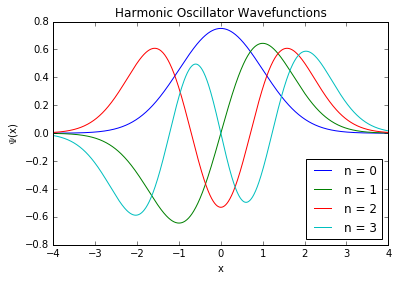

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

def H(n,x):
    h = [1,2*x]
    for i in range (2,n+1):
        hn = 2*x*h[i-1]-2*(i-1)*h[i-2]
        h.append(hn)
    if n == 0 :
        return h[0]
    if n == 1:
        return h[1]
    else:
        return h[n]
    
print (H(3,1))

def Y(n,x):
    y = (1/(np.sqrt((2**n)*(factorial(n))*np.sqrt(np.pi))))*np.exp((-x*x)/2)*H(n,x)
    return y

x = np.arange(-4,4,0.01)

plt.figure()
for i in range(0,4):
    plt.plot(x,Y(i,x),label = "n = %d" %i)

plt.ylabel('$\Psi$(x)')
plt.xlabel('x')
plt.title('Harmonic Oscillator Wavefunctions')
plt.legend(loc='lower right')
plt.show()

b) Make a separate plot of the wavefunction for $n=30$ from $x=-10$ to
  $x=10$.  Hint: If your program takes too long to run in this case, then
  you're doing the calculation wrong---the program should take only a
  second or so to run.


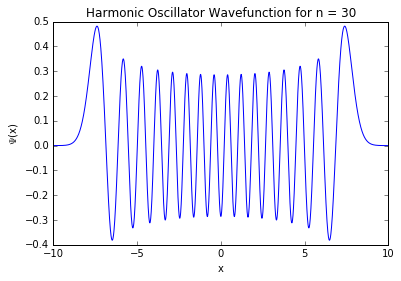

In [8]:
x2 = np.arange(-10,10,0.01)
plt.figure()
plt.plot(x2,Y(30,x2))
plt.ylabel('$\Psi$(x)')
plt.xlabel('x')
plt.title('Harmonic Oscillator Wavefunction for n = 30')


c) The quantum uncertainty of a particle in the $n$th level of a quantum
  harmonic oscillator can be quantified by its root-mean-square position
  $\sqrt{\expval{x^2}}$, where
$$
\expval{x^2} = \int_{-\infty}^\infty x^2 \abs{\psi_n(x)}^2 \> dx.
$$
Write a program that evaluates this integral using Gaussian quadrature on
100 points and then calculates the uncertainty (i.e., the root-mean-square
position of the particle) for a given value of $n$.  Use your program to
calculate the uncertainty for $n=5$.  You should get an answer in the
vicinity of $\sqrt{\expval{x^2}}=2.3$.


In [18]:
from gaussxw import gaussxw

def f(n,x):
    f = x*x*Y(n,x)*Y(n,x)
    return f
def fz(n,z):
    fz = ((1+z*z)/((1-z*z)*(1-z*z)))*f(n,(z/(1-z*z)))
    return fz

N = 100
a = -1
b = 1

x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

I = 0
for i in range(N):
    I += wp[i]*fz(5,xp[i])
    
print(np.sqrt(I))

2.34520787379
